In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
import os
print(os.listdir("input"))
features=pd.read_csv('input/GS_South_Pars.csv')
features.head(5)

['00 train test valid Code For Exergy.ipynb', '00 train test valid Code For HHV.ipynb', '00 train test valid Code For PCC.ipynb', '00 train test valid Code For Power1.ipynb', '00 train test valid First 8 Algorithm hydrogen.ipynb', '00 train test valid hydrogen2.ipynb', '00 train test valid Power 2 MLP-XGB.ipynb', 'DATAA.csv', 'DataJP.csv', 'GS_South_Pars.csv']


,CO2(in),H2S(in),N2(in),C1(in),C2(in),C3(in),IC4(in),HEX-T-HOT-C,REG-COL-MOLE-RR,GASIN-MASSFLOW-(KG/HR),VALVE-P-OUT-(BAR),H2S(out),CO2(out),MAMINE(MOL/HR),MH2O(MOL/HR),HHV(KJ/CUM),EXERGY(KW)
0,3.5024,0.5421,5.2601,73.7038,8.2445,4.1034,1.4924,45.0,2.3,150000,4,9.530000e-07,0.014074,6.481078,511446.331,41826.8352,22366.7950
1,3.5024,0.5421,5.2601,73.7038,8.2445,4.1034,1.4924,45.0,2.3,150000,8,9.590000e-07,0.014074,6.479831,511017.205,41826.8375,22366.7956
2,3.5024,0.5421,5.2601,73.7038,8.2445,4.1034,1.4924,45.0,2.3,150000,12,9.640000e-07,0.014074,6.480208,510622.626,41826.8364,22366.8097
3,3.5024,0.5421,5.2601,73.7038,8.2445,4.1034,1.4924,45.0,2.3,150000,16,9.680000e-07,0.014074,6.480210,510244.085,41826.8397,22366.8123
4,3.5024,0.5421,5.2601,73.7038,8.2445,4.1034,1.4924,45.0,2.3,237500,4,1.180000e-06,0.014650,7.304100,497776.286,41821.8798,35379.3170


In [2]:
features=features.sample(n=21200, replace=True,random_state=40)
features.head()

,CO2(in),H2S(in),N2(in),C1(in),C2(in),C3(in),IC4(in),HEX-T-HOT-C,REG-COL-MOLE-RR,GASIN-MASSFLOW-(KG/HR),VALVE-P-OUT-(BAR),H2S(out),CO2(out),MAMINE(MOL/HR),MH2O(MOL/HR),HHV(KJ/CUM),EXERGY(KW)
11590,0.2024,0.35421,4.4601,75.6917,7.5445,4.6034,3.9924,51.0,2.6,150000,4,8.780000e-07,0.000763,6.527265,542770.751,43256.4901,22579.2367
14555,0.2024,0.35421,2.4601,80.6917,5.5445,3.6034,3.9924,69.0,2.6,150000,8,7.810000e-07,0.000737,6.511555,542611.256,43070.9045,23244.8761
14501,0.2024,0.35421,2.4601,80.6917,5.5445,3.6034,3.9924,69.0,2.4,150000,8,8.280000e-07,0.000738,6.510594,542624.678,43070.8824,23244.8854
16065,4.2024,1.35421,2.4601,81.6917,3.5445,2.6034,1.9924,63.0,2.3,400000,8,1.590000e-06,0.016941,10.156730,279889.884,41272.7167,61689.4195
11532,0.2024,0.35421,4.4601,75.6917,7.5445,4.6034,3.9924,51.0,2.4,200000,12,7.720000e-07,0.000816,7.169558,536103.045,43265.7765,30080.1212


In [3]:

col_randoms = ["CO2(in)", "H2S(in)","N2(in)","C1(in)","C2(in)","C3(in)","IC4(in)","HEX-T-HOT-C","REG-COL-MOLE-RR","GASIN-MASSFLOW-(KG/HR)","VALVE-P-OUT-(BAR)"]
col_targets = ["HHV(KJ/CUM)"]

features_ = features[col_randoms ]
labels = features[col_targets]

type(features)

pandas.core.frame.DataFrame

In [4]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features_, labels, test_size = 0.30, random_state = 42)

In [5]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [6]:
rfr=RandomForestRegressor(random_state=40)

In [7]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [int(x) for x in np.linspace(10,100,5,endpoint=True,dtype = int)],
    'min_samples_leaf': [int(x) for x in np.linspace(2,10,4,endpoint=True,dtype = int)],
    'min_samples_split':[int(x) for x in np.linspace(2,15,4,endpoint=True,dtype = int)],
    'n_estimators': [int(x) for x in np.linspace(50,1200,8,endpoint=True,dtype = int)]
}

In [8]:
CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 6,scoring='neg_mean_absolute_error',n_jobs = -1, verbose = 2)
CV_rfc.fit(train_features,train_labels)

Fitting 6 folds for each of 640 candidates, totalling 3840 fits


GridSearchCV(cv=6, estimator=RandomForestRegressor(random_state=40), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [10, 32, 55, 77, 100],
                         'min_samples_leaf': [2, 4, 7, 10],
                         'min_samples_split': [2, 6, 10, 15],
                         'n_estimators': [50, 214, 378, 542, 707, 871, 1035,
                                          1200]},
             scoring='neg_mean_absolute_error', verbose=2)

In [9]:
print(CV_rfc.best_params_)

{'bootstrap': True, 'max_depth': 32, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1035}


In [10]:
print(CV_rfc.best_score_)

-0.04692452541483332


In [11]:
print(CV_rfc.cv_results_)

{'mean_fit_time': array([ 1.15176654,  5.62828426,  8.67483242, 12.05291498, 16.13300872,
       20.64210653, 24.80835382, 29.62580641,  1.149508  ,  5.96935674,
        9.18729834, 13.30888355, 17.10181475, 21.42594441, 28.57496989,
       32.40540914,  1.55353288,  5.28255439, 11.12271404, 13.89712083,
       16.86822848, 20.64471614, 24.92324257, 28.93775554,  1.1524961 ,
        5.01015695,  9.00020345, 12.68846587, 16.68862335, 20.28713508,
       24.44879393, 28.26773246,  1.23501925,  5.24473675,  8.99152446,
       12.87568859, 19.95946916, 27.09215192, 31.17200132, 32.83389854,
        1.24150765,  5.48269935,  9.18684777, 13.44460078, 17.81040974,
       21.63741251, 25.35361457, 29.57224905,  1.27832035,  5.33524617,
        9.17602158, 13.53678429, 17.38507605, 21.40196776, 25.82745043,
       29.54417372,  1.20231315,  5.1377763 ,  9.0087285 , 12.98664133,
       17.45443944, 21.56392312, 25.65946627, 32.65650968,  1.49176288,
        6.03657301, 11.66422327, 14.42614913, 

In [12]:

BaseLineRFR=RandomForestRegressor(bootstrap=True,
                                             max_depth=32,
                                             min_samples_leaf=2,
                                             min_samples_split=2,
                                             n_estimators=1035)
import joblib

joblib.dump(BaseLineRFR, "./BaseLineModelrandom_forest_Regression.joblib",compress=3)

['./BaseLineModelrandom_forest_Regression.joblib']

In [13]:
BaseLineModel = joblib.load("./BaseLineModelrandom_forest_Regression.joblib")
BaseLineModel.fit(train_features,train_labels)
Bpredicted_labels_train_features=BaseLineModel.predict(train_features)
Bpredicted_labels_test_features=BaseLineModel.predict(test_features)

In [14]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#print("Correlation Coefficient (r) of Baseline Random Forest Regression Model on Training Data: ",pearsonr(train_labels,Bpredicted_labels_train_features))
#print("Correlation Coefficient (r) of Baseline Random Forest Regression Model on Testing Data: ",pearsonr(test_labels,Bpredicted_labels_test_features))

print("MAE of Baseline Random Forest Regression Model on Training Data: ",mean_absolute_error(train_labels,Bpredicted_labels_train_features))
print("MAE of Baseline Random Forest Regression Model on Testing Data: ",mean_absolute_error(test_labels,Bpredicted_labels_test_features))

print("R2 of Baseline Random Forest Regression Model on Training Data: ",r2_score(train_labels,Bpredicted_labels_train_features))
print("R2 of Baseline Random Forest Regression Model on Testing Data: ",r2_score(test_labels,Bpredicted_labels_test_features))

print("RMSE of Baseline Random Forest Regression Model on Training Data: ",np.sqrt(mean_squared_error(train_labels,Bpredicted_labels_train_features)))
print("RMSE of Baseline Random Forest Regression Model on Testing Data: ",np.sqrt(mean_squared_error(test_labels,Bpredicted_labels_test_features)))

MAE of Baseline Random Forest Regression Model on Training Data:  0.021041540351656188
MAE of Baseline Random Forest Regression Model on Testing Data:  0.0371584793639736
R2 of Baseline Random Forest Regression Model on Training Data:  0.9999999971874278
R2 of Baseline Random Forest Regression Model on Testing Data:  0.9999999909805559
RMSE of Baseline Random Forest Regression Model on Training Data:  0.05670499314732494
RMSE of Baseline Random Forest Regression Model on Testing Data:  0.10141730482865773


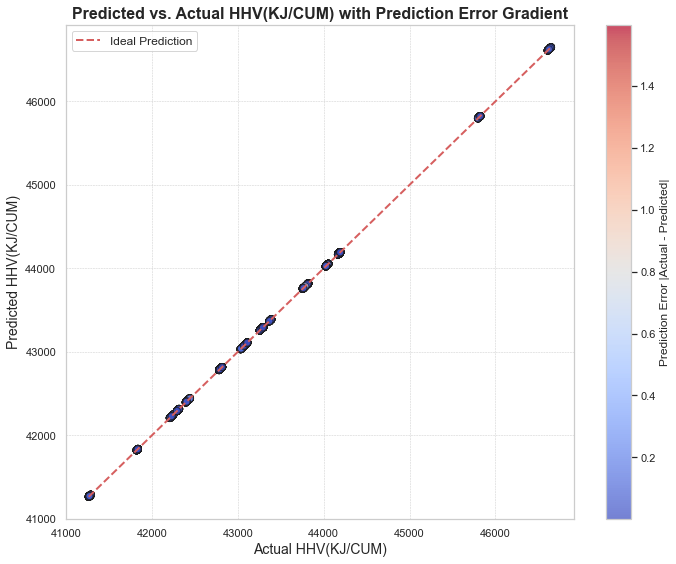

In [15]:
y_test_original= test_labels  # Original test labels for readability
y_pred_1 = BaseLineModel.predict(test_features)  # Predictions from the GA-optimized model




y_test_original = np.array(y_test_original).flatten()
y_pred_1 = np.array(y_pred_1).flatten()



import seaborn as sns
# Set the style for Seaborn
sns.set(style="whitegrid", palette="muted")

# Set figure size and create a scatter plot with color gradient
plt.figure(figsize=(10, 8))
sc = plt.scatter(
    y_test_original, y_pred_1, 
    c=np.abs(y_pred_1 - y_test_original), 
    cmap="coolwarm", s=50, alpha=0.7, edgecolor="k"
)

# Add color bar to indicate prediction error (absolute difference)
cbar = plt.colorbar(sc)
cbar.set_label("Prediction Error |Actual - Predicted|", fontsize=12)

# Plot a 1:1 line for reference (ideal predictions)
plt.plot(
    [y_test_original.min(), y_test_original.max()], 
    [y_test_original.min(), y_test_original.max()], 
    'r--', lw=2, label="Ideal Prediction"
)

# Set axis labels and title with enhanced font size
plt.xlabel("Actual HHV(KJ/CUM)", fontsize=14)
plt.ylabel("Predicted HHV(KJ/CUM)", fontsize=14)
plt.title("Predicted vs. Actual HHV(KJ/CUM) with Prediction Error Gradient", fontsize=16, fontweight='bold')

# Customize legend and plot aesthetics
plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Predicted')

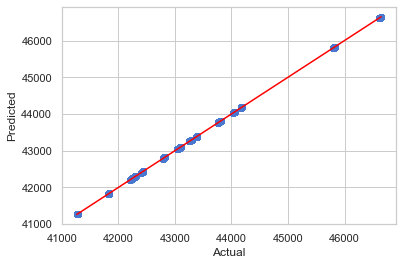

In [16]:
plt.scatter(test_labels,Bpredicted_labels_test_features)
plt.plot([test_labels.min(),test_labels.max()],[Bpredicted_labels_test_features.min(),Bpredicted_labels_test_features.max()], color='red')
#plt.scatter(valid_y,valid_y, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

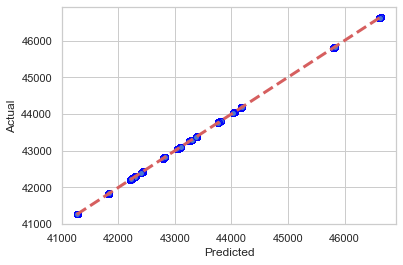

In [17]:
fig, ax = plt.subplots()
ax.scatter(test_labels,Bpredicted_labels_test_features, edgecolors=(0, 0, 1))
ax.plot([test_labels.min(), test_labels.max()], [Bpredicted_labels_test_features.min(), Bpredicted_labels_test_features.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [18]:
#from sklearn import linear_model
from genetic_selection import GeneticSelectionCV

                                        
Featureselector = GeneticSelectionCV(BaseLineModel,
                                  cv=5,
                                  verbose=1,
                                  scoring="neg_mean_absolute_error", 
                                  max_features=11,
                                  n_population=20,
                                  crossover_proba=0.05,
                                  mutation_proba=0.001,
                                  n_generations=50,
                                  crossover_independent_proba=0.5,
                                  mutation_independent_proba=0.05,
                                  tournament_size=3,
                                  n_gen_no_change=10,
                                  caching=True,
                                  n_jobs=-1)
FeatureselectorModel = Featureselector.fit(train_features,train_labels)

Selecting features with genetic algorithm.
gen	nevals	avg                                  	std                                  	min                                  	max                            
0  	20    	[-113.255766    6.75        2.139839]	[ 210.933198    3.92269     3.805285]	[-818.403104    1.          0.001969]	[-0.045958 11.       13.180676]
1  	2     	[-0.483279  9.35      0.007246]      	[ 1.66669   1.930673  0.020399]      	[-7.717328  7.        0.001969]      	[-0.045958 11.        0.096072]
2  	0     	[-0.047534  8.6       0.002174]      	[ 0.001931  1.959592  0.000252]      	[-0.049965  7.        0.001969]      	[-0.045958 11.        0.002515]
3  	0     	[-0.046154  7.2       0.001995]      	[ 0.000853  0.87178   0.000114]      	[-0.049871  7.        0.001969]      	[-0.045958 11.        0.002493]
4  	2     	[-0.045954  7.        0.001966]      	[ 0.000016  0.        0.000007]      	[-0.045958  7.        0.001944]      	[-0.045884  7.        0.001969]
5  	0     	[-0.

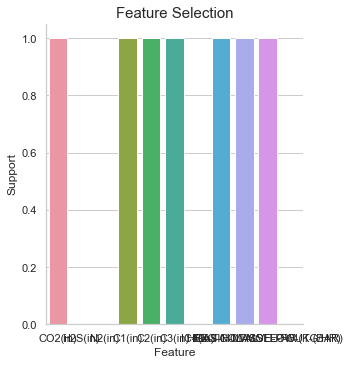

,Feature,Support,Score
0,CO2(in),True,-0.045958
1,H2S(in),False,-0.045958
2,N2(in),False,-0.045958
3,C1(in),True,-0.045958
4,C2(in),True,-0.045884
5,C3(in),True,-0.045884
6,IC4(in),False,-0.045884
7,HEX-T-HOT-C,True,-0.045884
8,REG-COL-MOLE-RR,True,-0.045884
9,GASIN-MASSFLOW-(KG/HR),True,-0.045884


In [19]:
featurename= list(features_.columns.values)

df = pd.DataFrame((featurename,Featureselector.support_,Featureselector.generation_scores_))

Transpose=df.T
Transpose.columns =['Feature','Support','Score']
Transpose.head()
import seaborn as sns
import matplotlib.pyplot as plt
sns.factorplot(x= 'Feature', y= 'Support', data= Transpose, kind = 'bar', legend='True')
plt.title('Feature Selection',fontsize=15)
plt.show()
Transpose

In [20]:
predicted_labels_train_features=FeatureselectorModel .predict(train_features)
predicted_labels_test_features=FeatureselectorModel .predict(test_features)

print("Correlation Coefficient (r) of Optimised Random Forest Regression Model on Training Data: ",r2_score(train_labels,predicted_labels_train_features))
print("Correlation Coefficient (r) of Optimised Random Forest Regression Model on Testing Data: ",r2_score(test_labels,predicted_labels_test_features))

print("MAE of Optimised Random Forest Regression Model on Training Data: ",mean_absolute_error(train_labels,predicted_labels_train_features))#t/ha
print("MAE of Optimised Random Forest Regression Model on Testing Data: ",mean_absolute_error(test_labels,predicted_labels_test_features))#t/ha

print("RMSE of Optimised Random Forest Regression Model on Training Data: ",np.sqrt(mean_squared_error(train_labels,predicted_labels_train_features)))#t/ha
print("RMSE of Optimised Random Forest Regression Model on Testning Data: ",np.sqrt(mean_squared_error(test_labels,predicted_labels_test_features)))#t/ha

Correlation Coefficient (r) of Optimised Random Forest Regression Model on Training Data:  0.9999999971432341
Correlation Coefficient (r) of Optimised Random Forest Regression Model on Testing Data:  0.9999999916490696
MAE of Optimised Random Forest Regression Model on Training Data:  0.020762157161075597
MAE of Optimised Random Forest Regression Model on Testing Data:  0.03433792879218202
RMSE of Optimised Random Forest Regression Model on Training Data:  0.057148757109532024
RMSE of Optimised Random Forest Regression Model on Testning Data:  0.09758647054391453


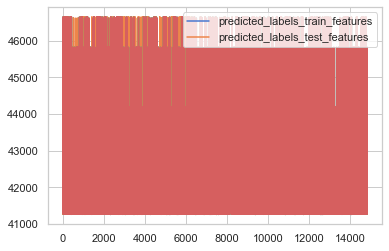

In [21]:
plt.plot(predicted_labels_train_features)
plt.plot(predicted_labels_test_features)
plt.plot(Bpredicted_labels_train_features)
plt.plot(Bpredicted_labels_train_features)

plt.legend(['predicted_labels_train_features','predicted_labels_test_features'])

In [22]:
fig = plt.figure(figsize=(15,5))

<Figure size 1080x360 with 0 Axes>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


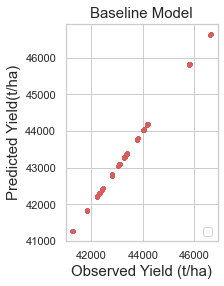

In [23]:
ax1 = plt.subplot(1, 2, 1)
ax1.scatter(train_labels,Bpredicted_labels_train_features,s=10, c='b', marker="o")
ax1.scatter(test_labels,Bpredicted_labels_test_features,s=10, c='r', marker="o")
plt.xlabel('Observed Yield (t/ha)',fontsize=15)
plt.ylabel('Predicted Yield(t/ha)',fontsize=15)
plt.title('Baseline Model',fontsize=15)
plt.legend(loc="lower right")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


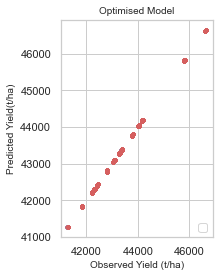

In [24]:
ax1 = plt.subplot(1, 2, 2)
ax1.scatter(train_labels,predicted_labels_train_features,s=10, c='b', marker="o")
ax1.scatter(test_labels,predicted_labels_test_features,s=10, c='r', marker="o")
plt.xlabel('Observed Yield (t/ha)',fontsize=10)
plt.ylabel('Predicted Yield(t/ha)',fontsize=10)
plt.title('Optimised Model',fontsize=10)
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Predicted')

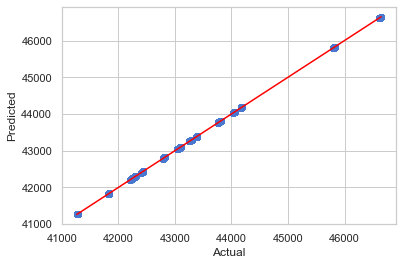

In [25]:
plt.scatter(test_labels,predicted_labels_test_features)
plt.plot([test_labels.min(),test_labels.max()],[predicted_labels_test_features.min(),predicted_labels_test_features.max()], color='red')
#plt.scatter(valid_y,valid_y, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

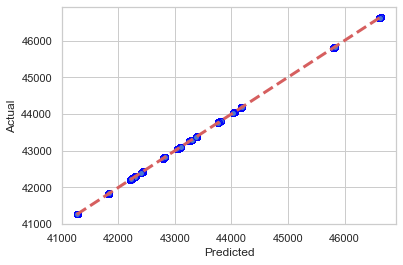

In [26]:
fig, ax = plt.subplots()
ax.scatter(test_labels,predicted_labels_test_features, edgecolors=(0, 0, 1))
ax.plot([test_labels.min(), test_labels.max()], [predicted_labels_test_features.min(), predicted_labels_test_features.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [27]:
import pickle

In [40]:
# Open file - Write binary mode
#model_file = open('FeatureselectorModel.model', 'wb')
#
## Save Decision tree model
#pickle.dump(FeatureselectorModel, model_file)
#
## Close file
#model_file.close()

In [29]:
# به منظور ذخیره ی فایل و استفاده ی مجدد از لینک زیر استفاده کن
#https://colab.research.google.com/github/kaopanboonyuen/2110446_DataScience_2021s2/blob/main/code/week5_ml/7_Save_Load_Model-v2.ipynb#scrollTo=rIzxUnT-mhHU

In [28]:
# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import numpy as np

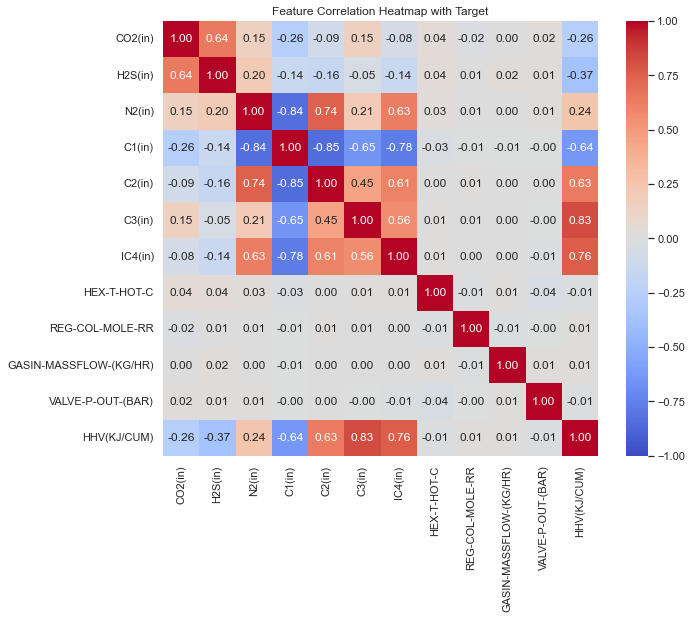

In [29]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = features_.join(labels).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap with Target")
plt.show()

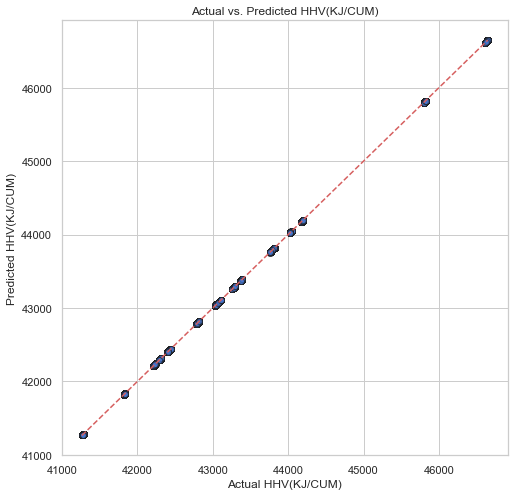

In [30]:
# Assuming 'predictions' contains model predictions for the test set
predictions = FeatureselectorModel.predict(test_features)  # Replace 'model' with your trained model variable

plt.figure(figsize=(8, 8))
plt.scatter(test_labels, predictions, alpha=0.6, color='b', edgecolors='k')
plt.plot([test_labels.min(), test_labels.max()], [test_labels.min(), test_labels.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual HHV(KJ/CUM)")
plt.ylabel("Predicted HHV(KJ/CUM)")
plt.title("Actual vs. Predicted HHV(KJ/CUM)")
plt.grid(True)
plt.show()

In [31]:
# Initialize lists to store fitness information for each generation
best_fitness = []
avg_fitness = []
worst_fitness = []
diversity = []  # Optional, for population diversity tracking
best_solution_per_generation = []

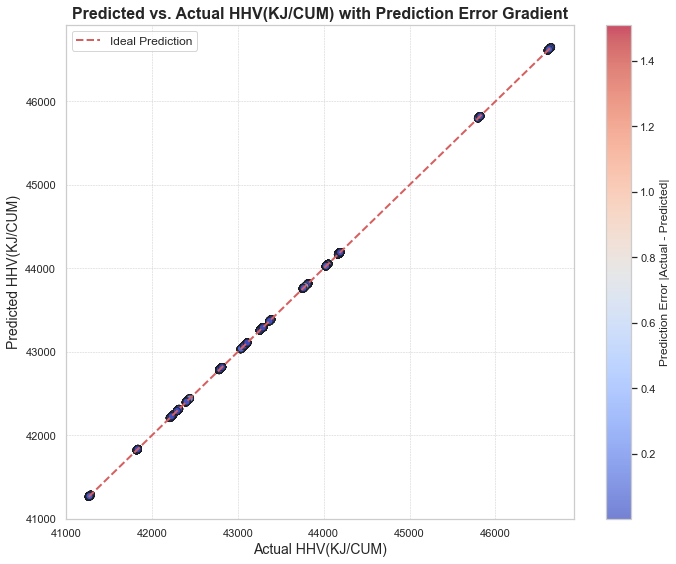

In [32]:
# Assuming y_test contains the true values and y_pred contains the predictions
y_test_original= test_labels  # Original test labels for readability
y_pred = FeatureselectorModel.predict(test_features)  # Predictions from the GA-optimized model




y_test_original = np.array(y_test_original).flatten()
y_pred = np.array(y_pred).flatten()




# Set the style for Seaborn
sns.set(style="whitegrid", palette="muted")

# Set figure size and create a scatter plot with color gradient
plt.figure(figsize=(10, 8))
sc = plt.scatter(
    y_test_original, y_pred, 
    c=np.abs(y_pred - y_test_original), 
    cmap="coolwarm", s=50, alpha=0.7, edgecolor="k"
)

# Add color bar to indicate prediction error (absolute difference)
cbar = plt.colorbar(sc)
cbar.set_label("Prediction Error |Actual - Predicted|", fontsize=12)

# Plot a 1:1 line for reference (ideal predictions)
plt.plot(
    [y_test_original.min(), y_test_original.max()], 
    [y_test_original.min(), y_test_original.max()], 
    'r--', lw=2, label="Ideal Prediction"
)

# Set axis labels and title with enhanced font size
plt.xlabel("Actual HHV(KJ/CUM)", fontsize=14)
plt.ylabel("Predicted HHV(KJ/CUM)", fontsize=14)
plt.title("Predicted vs. Actual HHV(KJ/CUM) with Prediction Error Gradient", fontsize=16, fontweight='bold')

# Customize legend and plot aesthetics
plt.legend(loc="upper left", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()

In [33]:
print("Number of features in train_features:", train_features.shape[1])


Number of features in train_features: 11


In [34]:
importances = FeatureselectorModel.estimator_.feature_importances_
print("Shape of importances:", importances.shape)

Shape of importances: (7,)


Selected features: ['CO2(in)' 'C1(in)' 'C2(in)' 'C3(in)' 'HEX-T-HOT-C' 'REG-COL-MOLE-RR'
 'GASIN-MASSFLOW-(KG/HR)']
Shape of importances: (7,)


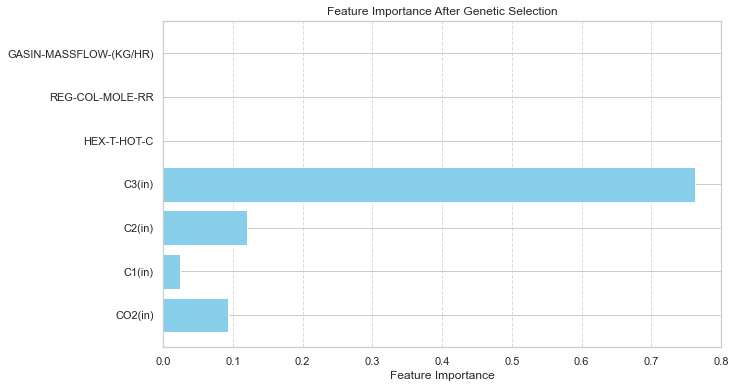

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Get the mask of selected features
selected_mask = FeatureselectorModel.support_
selected_features = np.array(train_features.columns)[selected_mask]

# Get importances
importances = FeatureselectorModel.estimator_.feature_importances_

# Check if the lengths match
print("Selected features:", selected_features)
print("Shape of importances:", importances.shape)

# Adjust to use only available importances for selected features
if len(selected_features) == importances.shape[0]:
    # Create a bar plot for feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(selected_features, importances, color='skyblue')
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance After Genetic Selection')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
else:
    print(f"Mismatch: {len(selected_features)} selected features vs. {importances.shape[0]} importances")
